In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('robot-ai-all-public.csv')

# Display the first few rows to understand the structure
print(df.head())


                 Article ID             Article Date Paragraph number  \
0  4fd1cbc98eb7c8105d701286  1996-10-06 00:00:00 UTC               18   
1  4fd1cbc98eb7c8105d701286  1996-10-06 00:00:00 UTC               18   
2  4fd1cbc98eb7c8105d701286  1996-10-06 00:00:00 UTC               18   
3  54b0793b7988100e21965770  2006-07-31 00:00:00 UTC               16   
4  54b0793b7988100e21965770  2006-07-31 00:00:00 UTC               16   

           NYT section                                          Paragraph  \
0  New York and Region  Thus, next weekend will feature the robot who ...   
1  New York and Region  Thus, next weekend will feature the robot who ...   
2  New York and Region  Thus, next weekend will feature the robot who ...   
3           Technology  That phrase was coined in the 1970۪s by Masahi...   
4           Technology  That phrase was coined in the 1970۪s by Masahi...   

                                             Title  WorkTimeInSeconds  \
0                        

In [2]:
# Data Cleaning
# Remove duplicates based on the 'Paragraph' column
df = df.drop_duplicates(subset=['Paragraph'])

# Remove rows with missing values in essential columns
df = df.dropna(subset=['Paragraph', 'AI Mood', 'NYT section', 'Title'])

# Convert 'Article Date' to datetime format
df['Article Date'] = pd.to_datetime(df['Article Date'], errors='coerce')



In [3]:
# Categorizing AI Mood scores
mood_mapping = {1: 'Very Negative', 2: 'Negative', 4: 'Positive', 5: 'Very Positive'}
df['Mood Category'] = df['AI Mood'].map(mood_mapping)

# Separate the data into low and high mood dataframes
df_low = df[df['Mood Category'].isin(['Very Negative', 'Negative'])]
df_high = df[df['Mood Category'].isin(['Positive', 'Very Positive'])]

# Calculate the total number of entries for low mood categories
total_low = df_low.shape[0]

# Sample from high mood categories to match the total number of low mood entries
df_high_sampled = df_high.sample(n=total_low, random_state=42)

# Combine the balanced low and high mood dataframes
df_balanced = pd.concat([df_low, df_high_sampled])


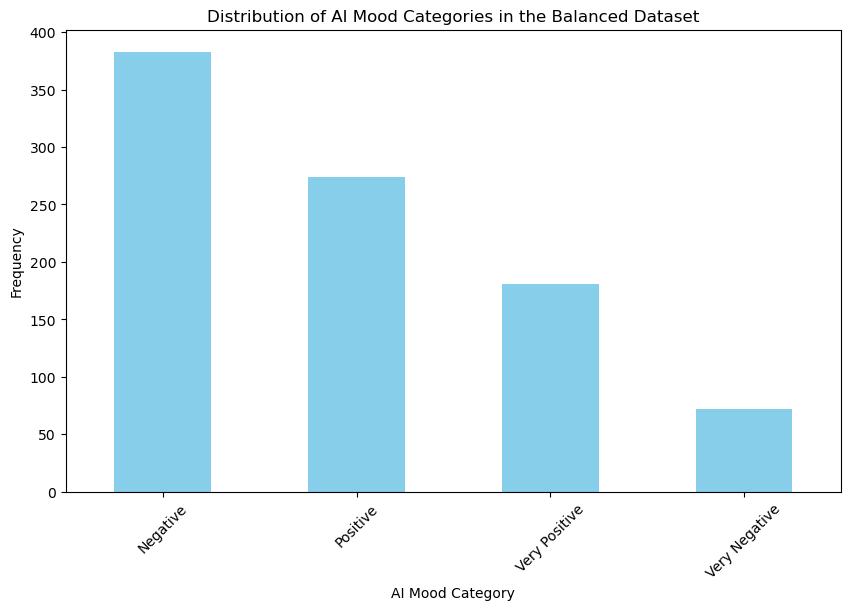

In [4]:
# Check and display the balance
mood_counts = df_balanced['Mood Category'].value_counts()
plt.figure(figsize=(10, 6))
mood_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of AI Mood Categories in the Balanced Dataset')
plt.xlabel('AI Mood Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



In [5]:
# Text Preprocessing
# Lowercase, remove punctuation, remove stop words
df_balanced['Processed Paragraph'] = df_balanced['Paragraph'].str.lower().str.replace('[^\w\s]', '')
stopwords = set(STOPWORDS)
df_balanced['Processed Paragraph'] = df_balanced['Processed Paragraph'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

# Combining text for word clouds
text_low = ' '.join(df_balanced[df_balanced['Mood Category'].isin(['Very Negative', 'Negative'])]['Processed Paragraph'])
text_high = ' '.join(df_balanced[df_balanced['Mood Category'].isin(['Positive', 'Very Positive'])]['Processed Paragraph'])


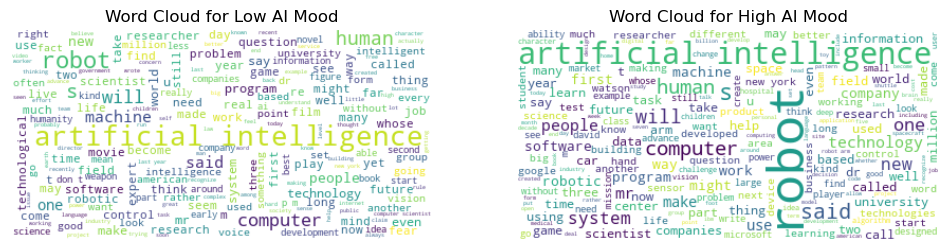

In [6]:
# Generate word clouds
wordcloud_low = WordCloud(stopwords=stopwords, background_color='white').generate(text_low)
wordcloud_high = WordCloud(stopwords=stopwords, background_color='white').generate(text_high)

# Display word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.title('Word Cloud for Low AI Mood')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.title('Word Cloud for High AI Mood')
plt.axis('off')
plt.show()


In [7]:
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords
import re

# Define custom stop words
custom_stopwords = set(stopwords.words('english'))  # NLTK's list of English stop words
custom_stopwords.update(['artificial', 'intelligence'])  # Add domain-specific terms

# Normalize text: lowercase, remove punctuation, remove stop words, and potentially lemmatize
df_balanced['Processed Paragraph'] = df_balanced['Paragraph'].apply(
    lambda x: ' '.join([
        word for word in re.sub(r'[^\w\s]', '', x.lower()).split() 
        if word not in custom_stopwords
    ])
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features based on your needs
X_low = vectorizer.fit_transform(df_balanced[df_balanced['Mood Category'].isin(['Very Negative', 'Negative'])]['Processed Paragraph'])
X_high = vectorizer.fit_transform(df_balanced[df_balanced['Mood Category'].isin(['Positive', 'Very Positive'])]['Processed Paragraph'])



Elbow and Silhouette plots for Low AI Mood:
SSE for k=2: 438.3661829732978
Silhouette Coefficient for k=2: 0.005875651133299071
SSE for k=3: 435.77967358228625
Silhouette Coefficient for k=3: 0.00546042248006016
SSE for k=4: 433.6443352709382
Silhouette Coefficient for k=4: 0.0044371147154025166
SSE for k=5: 433.16761717973503
Silhouette Coefficient for k=5: 0.003921340120042994
SSE for k=6: 430.7255106954836
Silhouette Coefficient for k=6: 0.0042664438220559
SSE for k=7: 429.537294026334
Silhouette Coefficient for k=7: 0.003933353697902287
SSE for k=8: 427.36176315993214
Silhouette Coefficient for k=8: 0.004767234474703702
SSE for k=9: 426.06030176285424
Silhouette Coefficient for k=9: 0.004716626503830414
SSE for k=10: 424.5479040988888
Silhouette Coefficient for k=10: 0.004518049831019712


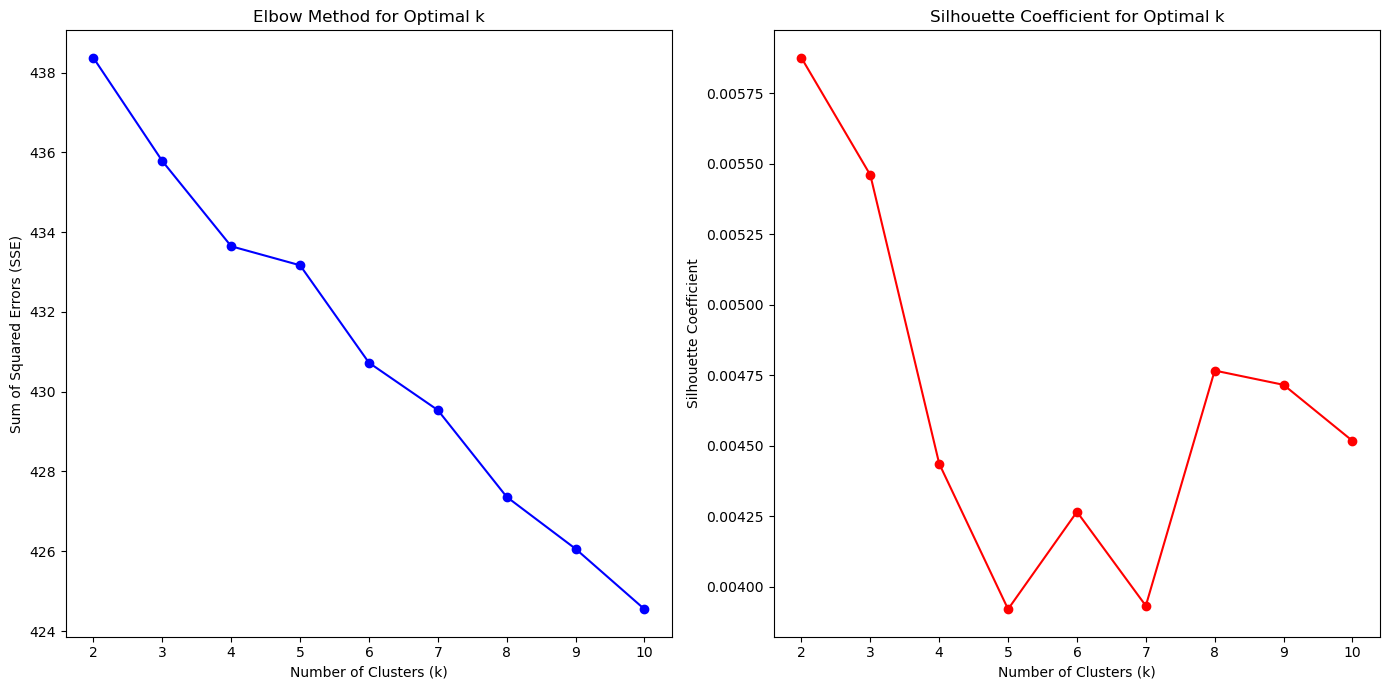

Elbow and Silhouette plots for High AI Mood:
SSE for k=2: 438.48009399319886
Silhouette Coefficient for k=2: 0.006443715690104796
SSE for k=3: 436.5609851857522
Silhouette Coefficient for k=3: 0.00465695399686858
SSE for k=4: 435.0832778402217
Silhouette Coefficient for k=4: 0.003968927622621716
SSE for k=5: 433.53725836500126
Silhouette Coefficient for k=5: 0.003840736678296724
SSE for k=6: 432.0755459205718
Silhouette Coefficient for k=6: 0.003492063820216008
SSE for k=7: 430.83345939336647
Silhouette Coefficient for k=7: 0.0023386998059446045
SSE for k=8: 428.5524184593842
Silhouette Coefficient for k=8: 0.003425347136732244
SSE for k=9: 427.3669594762473
Silhouette Coefficient for k=9: 0.003304093451396766
SSE for k=10: 426.36531683998413
Silhouette Coefficient for k=10: 0.0029475125226444705


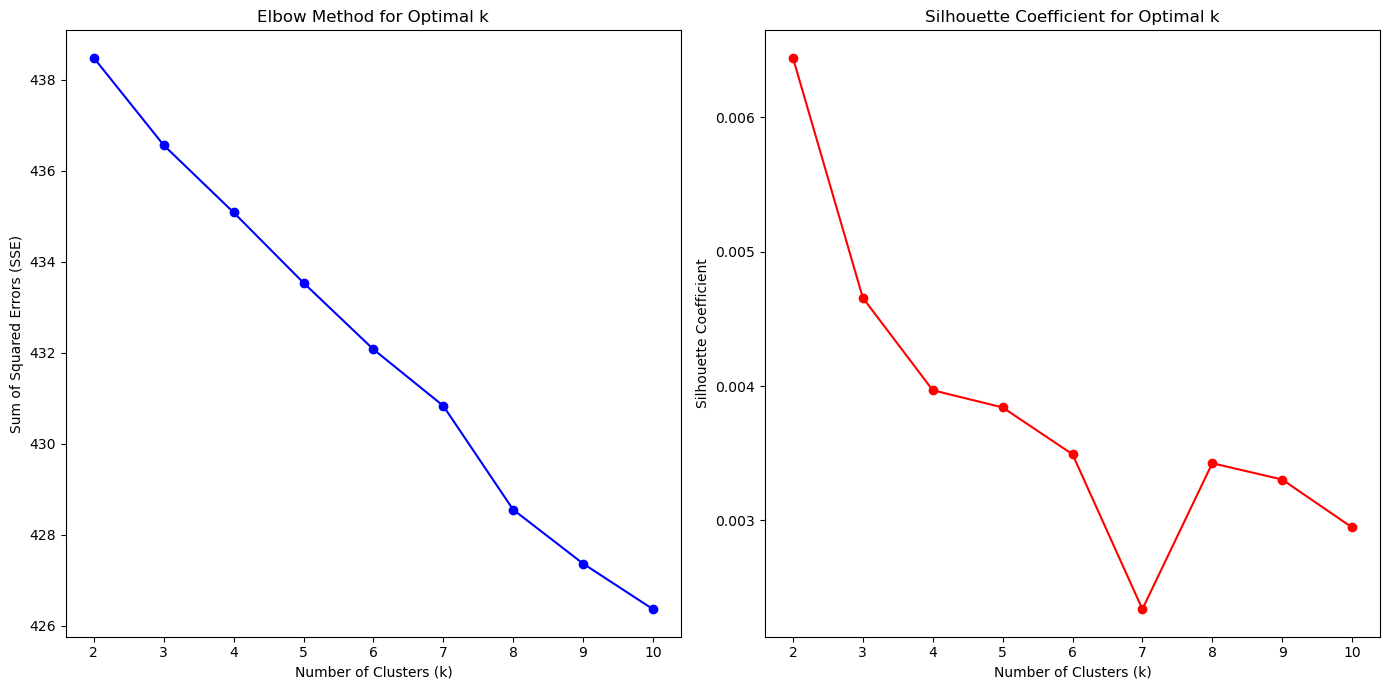

In [9]:
from sklearn.cluster import KMeans

def plot_elbow_silhouette(X, cluster_range):
    sse = []
    silhouette_coefficients = []
    valid_cluster_range = []  # List to keep track of valid k values for which silhouette is calculated
    
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)  # Sum of squared distances of samples to their closest cluster center
        print(f"SSE for k={k}: {kmeans.inertia_}")  # Print SSE for each k
        
        if k > 1:
            from sklearn.metrics import silhouette_score
            score = silhouette_score(X, kmeans.labels_)
            silhouette_coefficients.append(score)
            valid_cluster_range.append(k)  # Append k to valid_cluster_range
            print(f"Silhouette Coefficient for k={k}: {score}")  # Print silhouette score for each valid k

    # Plot SSE - Elbow Method
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, sse, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal k')
    
    # Plot Silhouette Coefficient, using valid_cluster_range
    plt.subplot(1, 2, 2)
    plt.plot(valid_cluster_range, silhouette_coefficients, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Coefficient')
    plt.title('Silhouette Coefficient for Optimal k')
    
    plt.tight_layout()
    plt.show()

# Define the range of k values to test
cluster_range = range(2, 11)  # Start from 2 to ensure silhouette can always be calculated

# Now run this function for both Low and High AI Moods
print("Elbow and Silhouette plots for Low AI Mood:")
plot_elbow_silhouette(X_low, cluster_range)

print("Elbow and Silhouette plots for High AI Mood:")
plot_elbow_silhouette(X_high, cluster_range)




In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Function to perform clustering and print the top terms for a given mood data and k
def process_and_cluster(data, k):
    # Vectorize the text data
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(data['Processed Paragraph'])

    # Initialize and fit K-means
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)

    # Get feature names from the TF-IDF vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Get the centroids
    centroids = kmeans.cluster_centers_

    # Print top terms per cluster
    print(f"\nTop terms per cluster for mood: {data['Mood Category'].iloc[0]}")
    for i in range(k):
        print(f"  Cluster {i + 1}:")
        # Sort the features of each centroid
        sorted_features = centroids[i].argsort()[::-1]
        # Print the top 10 words
        for j in sorted_features[:10]:
            print(f"    {feature_names[j]} ({centroids[i][j]:.2f})")
        print("\n")

# Split the dataset into positive and negative subsets
df_negative = df_balanced[df_balanced['Mood Category'].isin(['Very Negative', 'Negative'])]
df_positive = df_balanced[df_balanced['Mood Category'].isin(['Positive', 'Very Positive'])]

# Specify k = 3 based on the optimal number determined
k_optimal = 3

# Perform clustering and print the top terms for negative and positive moods
print("Analyzing Negative Mood Clusters:")
process_and_cluster(df_negative, k_optimal)

print("Analyzing Positive Mood Clusters:")
process_and_cluster(df_positive, k_optimal)




Analyzing Negative Mood Clusters:

Top terms per cluster for mood: Very Negative
  Cluster 1:
    mr (0.15)
    musk (0.11)
    hawking (0.07)
    said (0.06)
    like (0.06)
    elon (0.06)
    biggest (0.04)
    could (0.04)
    threat (0.04)
    stephen (0.04)


  Cluster 2:
    human (0.05)
    computer (0.04)
    ai (0.04)
    computers (0.04)
    machines (0.03)
    systems (0.03)
    think (0.03)
    us (0.03)
    technology (0.02)
    would (0.02)


  Cluster 3:
    robot (0.07)
    said (0.03)
    robots (0.03)
    new (0.03)
    one (0.02)
    people (0.02)
    like (0.02)
    also (0.02)
    two (0.02)
    work (0.02)


Analyzing Positive Mood Clusters:

Top terms per cluster for mood: Positive
  Cluster 1:
    human (0.05)
    software (0.05)
    computer (0.04)
    like (0.03)
    data (0.03)
    technology (0.02)
    ai (0.02)
    new (0.02)
    computers (0.02)
    program (0.02)


  Cluster 2:
    said (0.08)
    people (0.04)
    work (0.04)
    robot (0.04)
    mr (0.

In [19]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from torch.utils.data import DataLoader, Dataset
import torch
from sklearn.model_selection import train_test_split
import numpy as np

# Define a dataset class required by Hugging Face's Trainer
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Function to encode data using BERT tokenizer
def encode_data(tokenizer, texts, labels, max_length):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
    return SentimentDataset(encodings, labels)

# Loading the tokenizer and model from Hugging Face's Transformers
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)  # Move model to the appropriate device

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [21]:
# Prepare the data
texts = df_balanced['Processed Paragraph'].tolist()
labels = df_balanced['Mood Category'].apply(lambda x: 1 if x in ['Positive', 'Very Positive'] else 0).tolist()  # Binary encoding of labels

# Split data into train and validation
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.1, random_state=2021)

# Encode the data
train_dataset = encode_data(tokenizer, train_texts, train_labels, max_length=128)
val_dataset = encode_data(tokenizer, val_texts, val_labels, max_length=128)

In [22]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, accuracy_score
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch", 
    load_best_model_at_end=True,
    metric_for_best_model='loss',
    greater_is_better=False
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,  # Add this line
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [23]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.649500,0.639041,0.626374,0.706897,0.594203,0.872340
2,0.551300,0.425372,0.835165,0.831461,0.880952,0.787234
3,0.451500,0.673900,0.703297,0.756757,0.656250,0.893617


TrainOutput(global_step=309, training_loss=0.5402636813500167, metrics={'train_runtime': 839.8204, 'train_samples_per_second': 2.926, 'train_steps_per_second': 0.368, 'total_flos': 161615965754880.0, 'train_loss': 0.5402636813500167, 'epoch': 3.0})

In [24]:
# Evaluate the model
evaluation_result = trainer.evaluate()

# Print evaluation results
print(evaluation_result)

{'eval_loss': 0.4253719449043274, 'eval_accuracy': 0.8351648351648352, 'eval_f1': 0.8314606741573034, 'eval_precision': 0.8809523809523809, 'eval_recall': 0.7872340425531915, 'eval_runtime': 8.5808, 'eval_samples_per_second': 10.605, 'eval_steps_per_second': 0.699, 'epoch': 3.0}


In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions
predictions_output = trainer.predict(val_dataset)

# Get the logits from the predictions
logits = predictions_output.predictions

# Apply softmax if needed (to convert logits to probabilities) and take argmax to get the predicted labels
predicted_labels = np.argmax(logits, axis=-1)

# Now compute the confusion matrix
actual_labels = val_dataset.labels 
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[39  5]
 [10 37]]


In [27]:
!pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -- ------------------------------------ 20.5/294.9 kB 320.0 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 544.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 901.1 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00


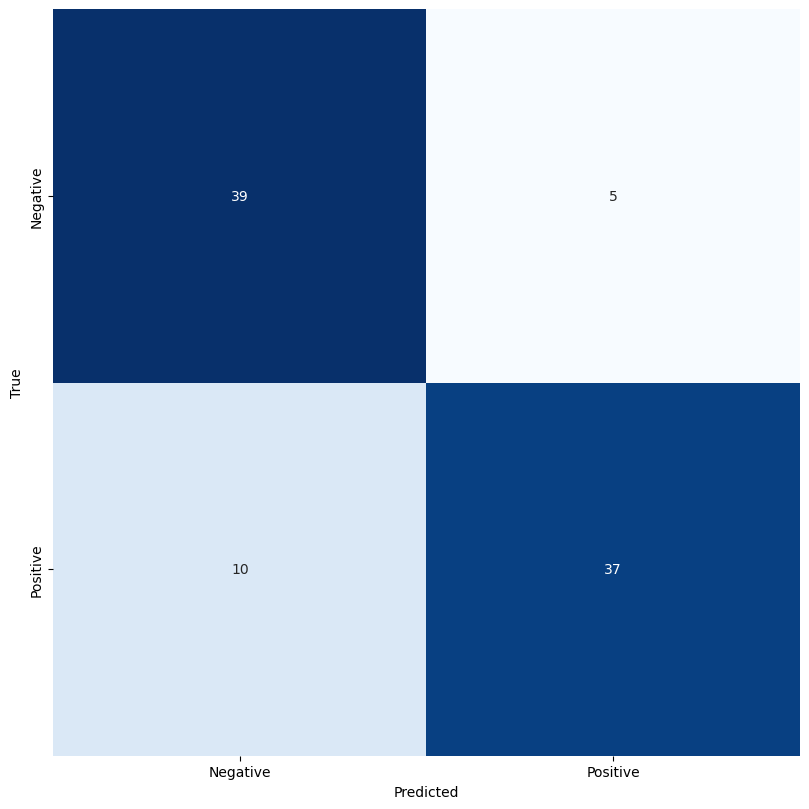

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
    """
    Returns a matplotlib figure containing the plotted confusion matrix.

    Args:
      cm (array, shape = [n, n]): a confusion matrix of integer classes
      class_names (array, shape = [n]): String names of the integer classes
    """
    figure = plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.show()

# Example: Plot confusion matrix
class_names = ['Negative', 'Positive']  # Adjust these to the actual names of your classes
plot_confusion_matrix(conf_matrix, class_names)


In [32]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix

# Ensure that the VADER lexicon is downloaded
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Assuming df_balanced['Processed Paragraph'] contains the text data
# Run VADER sentiment analysis
scores = df_balanced['Processed Paragraph'].apply(sia.polarity_scores)
df_balanced['compound'] = scores.apply(lambda score_dict: score_dict['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
# Map existing mood categories to 'positive' and 'negative'
mood_map = {
    'Negative': 'negative',
    'Positive': 'positive',
    'Very Negative': 'negative',
    'Very Positive': 'positive'
}
df_balanced['Mapped Mood'] = df_balanced['Mood Category'].map(mood_map)

# Classify sentiments based on the compound score
df_balanced['vader_pred'] = df_balanced['compound'].apply(lambda c: 'positive' if c > 0 else 'negative')

In [34]:
# Perform classification reporting
print(classification_report(df_balanced['Mapped Mood'], df_balanced['vader_pred']))

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(df_balanced['Mapped Mood'], df_balanced['vader_pred'])
print("Confusion Matrix:")
print(conf_matrix)

              precision    recall  f1-score   support

    negative       0.62      0.46      0.53       455
    positive       0.57      0.72      0.64       455

    accuracy                           0.59       910
   macro avg       0.60      0.59      0.58       910
weighted avg       0.60      0.59      0.58       910

Confusion Matrix:
[[209 246]
 [127 328]]


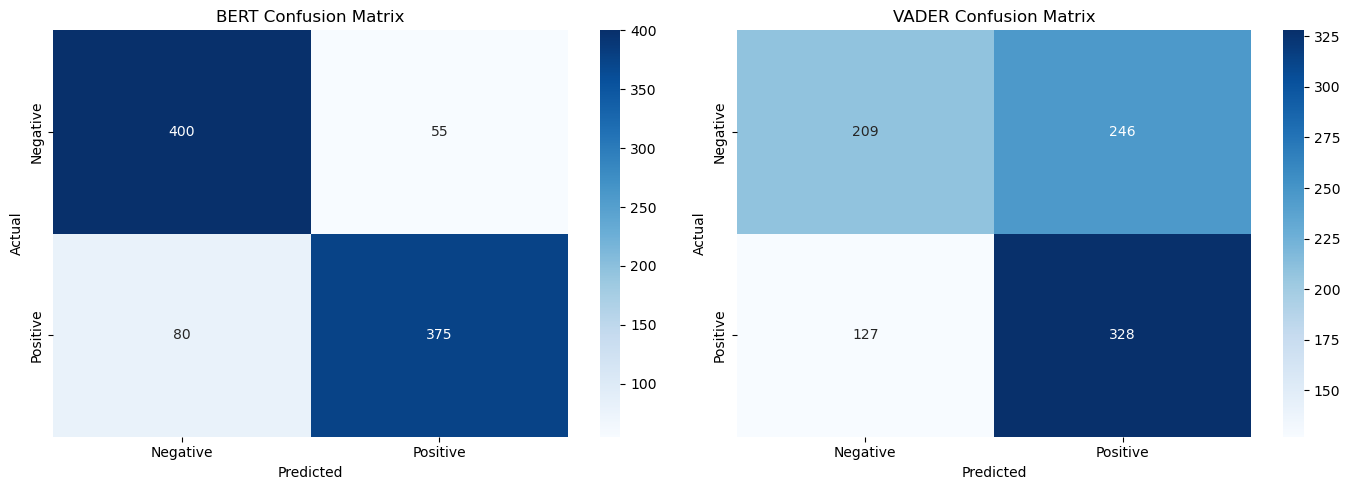

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# BERT confusion matrix values (example from the previous result)
bert_conf_matrix = np.array([[400, 55], [80, 375]])

# VADER confusion matrix values
vader_conf_matrix = np.array([[209, 246], [127, 328]])

# Plotting the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# BERT Confusion Matrix
sns.heatmap(bert_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('BERT Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].xaxis.set_ticklabels(['Negative', 'Positive'])
axes[0].yaxis.set_ticklabels(['Negative', 'Positive'])

# VADER Confusion Matrix
sns.heatmap(vader_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('VADER Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].xaxis.set_ticklabels(['Negative', 'Positive'])
axes[1].yaxis.set_ticklabels(['Negative', 'Positive'])

plt.tight_layout()
plt.show()


In [37]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader, Dataset
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

# Define a dataset class required by Hugging Face's Trainer
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Function to encode data using BERT tokenizer
def encode_data(tokenizer, texts, labels, max_length):
    encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
    return SentimentDataset(encodings, labels)

# Loading the tokenizer and model from Hugging Face's Transformers
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

C:\Users\jesus\anaconda3\envs\newenv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
# Preprocess labels to combine Positive and Very Positive into 'positive' and Negative and Very Negative into 'negative'
df_balanced['Mood Category'] = df_balanced['Mood Category'].replace({
    'Positive': 'positive',
    'Very Positive': 'positive',
    'Negative': 'negative',
    'Very Negative': 'negative'
})

# Prepare the data
texts = df_balanced['Processed Paragraph'].tolist()
labels = df_balanced['Mood Category'].apply(lambda x: 1 if x == 'positive' else 0).tolist()  # Binary encoding of labels

# Split data into train and validation
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.1, random_state=2021)

# Encode the data
train_dataset = encode_data(tokenizer, train_texts, train_labels, max_length=128)
val_dataset = encode_data(tokenizer, val_texts, val_labels, max_length=128)

In [39]:
# Define custom metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='binary')
    acc = accuracy_score(labels, predictions)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False
)

In [40]:
# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

C:\Users\jesus\anaconda3\envs\newenv\Lib\site-packages\accelerate\accelerator.py:446: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


In [41]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.653900,0.624407,0.670330,0.727273,0.634921,0.851064
2,0.586400,0.561668,0.725275,0.647887,0.958333,0.489362
3,0.450400,0.521503,0.725275,0.774775,0.671875,0.914894


Checkpoint destination directory ./results\checkpoint-103 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results\checkpoint-206 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Checkpoint destination directory ./results\checkpoint-309 already exists and is non-empty.Saving will proceed but saved results may be invalid.


TrainOutput(global_step=309, training_loss=0.5624753873325089, metrics={'train_runtime': 825.6178, 'train_samples_per_second': 2.976, 'train_steps_per_second': 0.374, 'total_flos': 161615965754880.0, 'train_loss': 0.5624753873325089, 'epoch': 3.0})

In [42]:
# Evaluate the model
evaluation_result = trainer.evaluate()

# Print evaluation results
print(evaluation_result)

{'eval_loss': 0.5215030908584595, 'eval_accuracy': 0.7252747252747253, 'eval_f1': 0.7747747747747747, 'eval_precision': 0.671875, 'eval_recall': 0.9148936170212766, 'eval_runtime': 8.5156, 'eval_samples_per_second': 10.686, 'eval_steps_per_second': 0.705, 'epoch': 3.0}


In [43]:
# Generate and print classification report
logits, labels = trainer.predict(val_dataset).predictions, val_labels
predictions = np.argmax(logits, axis=-1)
print(classification_report(val_labels, predictions, target_names=['negative', 'positive']))


              precision    recall  f1-score   support

    negative       0.85      0.52      0.65        44
    positive       0.67      0.91      0.77        47

    accuracy                           0.73        91
   macro avg       0.76      0.72      0.71        91
weighted avg       0.76      0.73      0.71        91



In [44]:
bert_conf_matrix = confusion_matrix(val_labels, predictions)
print("BERT Confusion Matrix:")
print(bert_conf_matrix)

BERT Confusion Matrix:
[[23 21]
 [ 4 43]]


In [47]:
# Import necessary packages for VADER
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to the validation set
val_df = pd.DataFrame({'text': val_texts, 'true_label': val_labels})
val_df['vader_pred'] = val_df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
val_df['vader_pred'] = val_df['vader_pred'].apply(lambda c: 1 if c > 0.05 else 0)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jesus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [48]:
# Generate classification report and confusion matrix for VADER
print("VADER Classification Report:")
print(classification_report(val_df['true_label'], val_df['vader_pred'], target_names=['negative', 'positive']))

VADER Classification Report:
              precision    recall  f1-score   support

    negative       0.50      0.27      0.35        44
    positive       0.52      0.74      0.61        47

    accuracy                           0.52        91
   macro avg       0.51      0.51      0.48        91
weighted avg       0.51      0.52      0.49        91



In [49]:
vader_conf_matrix = confusion_matrix(val_df['true_label'], val_df['vader_pred'])
print("VADER Confusion Matrix:")
print(vader_conf_matrix)

VADER Confusion Matrix:
[[12 32]
 [12 35]]


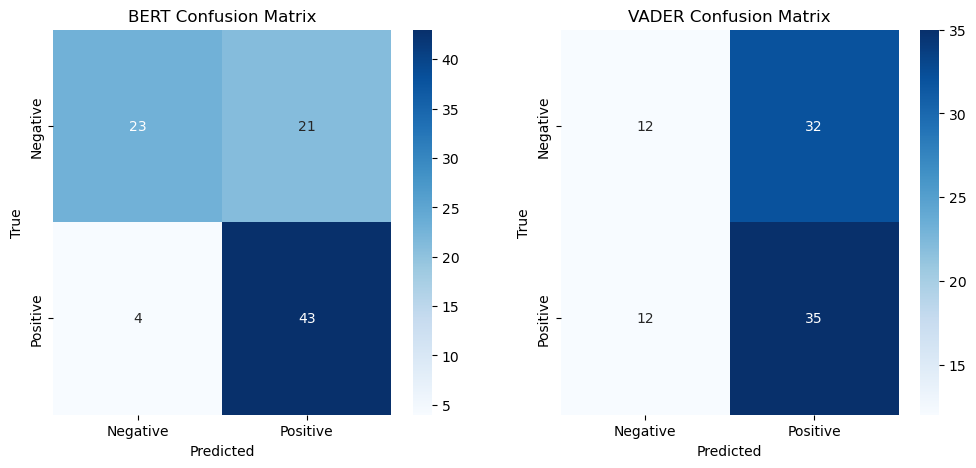

In [51]:
# Plotting the confusion matrices with labels
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(bert_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax[0], xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax[0].set_title('BERT Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(vader_conf_matrix, annot=True, fmt="d", cmap="Blues", ax=ax[1], xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
ax[1].set_title('VADER Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.show()